1.	Data Wrangling
●	Ensure that the data is clean and that there is no missing or incorrect data. 
○	Inspect the data manually for missing/incorrect data using the functions isna(), and notna().
●	Based on your knowledge of Data Analytics, include your recommendations for treating missing data and incorrect data. (dropping the null values or filling them).
●	Select an appropriate Data Wrangling approach —  data standardization or data normalization. Perform the standardization or normalization and present the data. (Normalization is the preferred approach for this problem.)
●	Share your recommendation on the usage of the groupby() function for data chunking or merging.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r"C:\Users\DELL\Downloads\1709645788_ausapparalsales4thqrt2020\AusApparalSales4thQrt2020.csv")

In [3]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [4]:
df.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [6]:
df.shape

(7560, 6)

In [7]:
df.size

45360

In [8]:
df.notna().sum()

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

In [9]:
df['Group'].unique()

array([' Kids', ' Men', ' Women', ' Seniors'], dtype=object)

In [10]:
df['State'].unique()

array([' WA', ' NT', ' SA', ' VIC', ' QLD', ' NSW', ' TAS'], dtype=object)

In [11]:
df['Unit'].unique()

array([ 8,  4, 15,  3, 10, 11, 13,  5,  6,  9, 14, 12, 16, 28, 21, 29, 22,
       32, 49, 36, 34, 26, 31, 27, 43, 50, 44, 20, 18, 19, 39, 17, 23, 40,
       30,  7, 33, 42, 46, 48, 37, 25, 35, 45, 47, 38, 41, 24,  2, 51, 63,
       62, 52, 56, 59, 64, 53, 61, 54, 60, 55, 65, 57, 58], dtype=int64)

In [12]:
df['Sales'].unique()

array([ 20000,  10000,  37500,   7500,  25000,  27500,  32500,  12500,
        15000,  22500,  35000,  30000,  40000,  70000,  52500,  72500,
        55000,  80000, 122500,  90000,  85000,  65000,  77500,  67500,
       107500, 125000, 110000,  50000,  45000,  47500,  97500,  42500,
        57500, 100000,  75000,  17500,  82500, 105000, 115000, 120000,
        92500,  62500,  87500, 112500, 117500,  95000, 102500,  60000,
         5000, 127500, 157500, 155000, 130000, 140000, 147500, 160000,
       132500, 152500, 135000, 150000, 137500, 162500, 142500, 145000],
      dtype=int64)

In [13]:
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
df['Unit'] = df['Unit'].astype(int)

In [15]:
df['Sales'] = df['Sales'].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int32         
 5   Sales   7560 non-null   int32         
dtypes: datetime64[ns](1), int32(2), object(3)
memory usage: 295.4+ KB


In [17]:
df.isnull().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

Suggestion for missing and incorrect data
1. missing data can be filled usinf ffill , bfill , fill(mean,median,mode) , df.bfill() , df.ffill(), df.fillna()
2. if missing data is too low we can also drop it. df.drop()
3. if there is missing data over 40% in a column we can drop the column.
4. for incorrect data there is outlier treatment and replace function , df.replace()

In [18]:
df.ffill()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500


In [19]:
df.dropna()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500


In [20]:
df.describe()

,Date,Unit,Sales
count,7560,7560.000000,7560.000000
mean,2020-11-15 04:00:00.000000256,18.005423,45013.558201
min,2020-10-01 00:00:00,2.000000,5000.000000
25%,2020-10-23 00:00:00,8.000000,20000.000000
50%,2020-11-15 12:00:00,14.000000,35000.000000
75%,2020-12-08 00:00:00,26.000000,65000.000000
max,2020-12-30 00:00:00,65.000000,162500.000000
std,NaN,12.901403,32253.506944


<Axes: xlabel='Unit'>

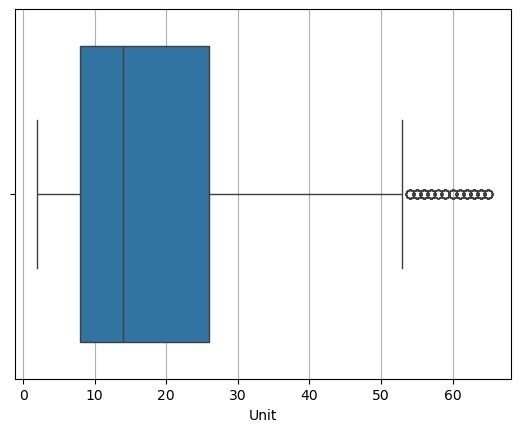

In [21]:
plt.grid('darkgrid')
sns.boxplot(x = 'Unit', data = df)

<Axes: xlabel='Sales'>

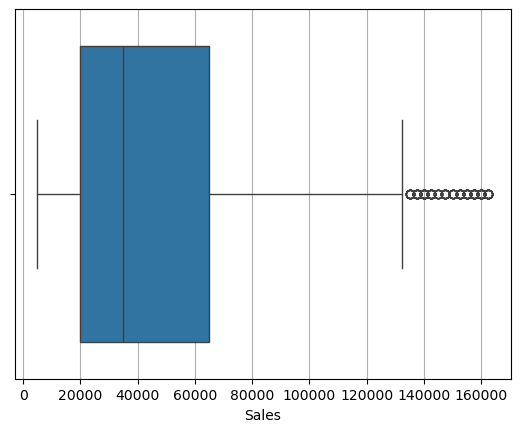

In [22]:
plt.grid('darkgrid')
sns.boxplot(x = 'Sales', data = df)

In [23]:
df.Unit.quantile([0.25,0.75])

0.25     8.0
0.75    26.0
Name: Unit, dtype: float64

In [24]:
unit_iqr = df.Unit.quantile([0.75]) - df.Unit.quantile(0.25)

In [25]:
unit_outlier = df.Unit.quantile([0.75]) + unit_iqr*1.5

In [26]:
unit_outlier = int(unit_outlier)

In [27]:
print(unit_outlier)

53


In [28]:
df.Sales.quantile([0.25,0.75])
Sales_iqr = df.Sales.quantile(0.75) - df.Sales.quantile(0.25)
Sales_outlier = df.Sales.quantile([0.75]) + Sales_iqr*1.5

In [29]:
print(Sales_outlier)

0.75    132500.0
Name: Sales, dtype: float64


In [30]:
Sales_outlier = int(Sales_outlier)

In [31]:
df = df[df['Unit'] <= unit_outlier]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7437 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7437 non-null   datetime64[ns]
 1   Time    7437 non-null   object        
 2   State   7437 non-null   object        
 3   Group   7437 non-null   object        
 4   Unit    7437 non-null   int32         
 5   Sales   7437 non-null   int32         
dtypes: datetime64[ns](1), int32(2), object(3)
memory usage: 348.6+ KB


In [33]:
df = df[df['Sales'] <= Sales_outlier]

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7437 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7437 non-null   datetime64[ns]
 1   Time    7437 non-null   object        
 2   State   7437 non-null   object        
 3   Group   7437 non-null   object        
 4   Unit    7437 non-null   int32         
 5   Sales   7437 non-null   int32         
dtypes: datetime64[ns](1), int32(2), object(3)
memory usage: 348.6+ KB


In [35]:
## Dropped 123 rows for outlier in Unit data
## Dropped 26 rows for outlier in Sales data

In [36]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from sklearn.preprocessing import  MinMaxScaler

In [37]:
numerical_cols = df.select_dtypes(include=['int32']).columns
print(numerical_cols)

Index(['Unit', 'Sales'], dtype='object')


In [38]:
df_numeric = df[numerical_cols]
print(df_numeric)

      Unit  Sales
0        8  20000
1        8  20000
2        4  10000
3       15  37500
4        3   7500
...    ...    ...
7555    14  35000
7556    15  37500
7557    15  37500
7558    11  27500
7559    13  32500

[7437 rows x 2 columns]


In [39]:
scaler_unit = MinMaxScaler()
df2 = scaler_unit.fit_transform(df_numeric)
print(df2)

[[0.11764706 0.11764706]
 [0.11764706 0.11764706]
 [0.03921569 0.03921569]
 ...
 [0.25490196 0.25490196]
 [0.17647059 0.17647059]
 [0.21568627 0.21568627]]


In [40]:
df2 = pd.DataFrame(df2, columns=df_numeric.columns)
print(df2)

          Unit     Sales
0     0.117647  0.117647
1     0.117647  0.117647
2     0.039216  0.039216
3     0.254902  0.254902
4     0.019608  0.019608
...        ...       ...
7432  0.235294  0.235294
7433  0.254902  0.254902
7434  0.254902  0.254902
7435  0.176471  0.176471
7436  0.215686  0.215686

[7437 rows x 2 columns]


In [41]:
norm_df = df.copy()

In [42]:
norm_df['Unit'] = df2['Unit']
norm_df['Sales'] = df2['Sales']
norm_df.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,0.117647,0.117647
1,2020-10-01,Morning,WA,Men,0.117647,0.117647
2,2020-10-01,Morning,WA,Women,0.039216,0.039216
3,2020-10-01,Morning,WA,Seniors,0.254902,0.254902
4,2020-10-01,Afternoon,WA,Kids,0.019608,0.019608


In [43]:
df.groupby('Group')['Sales'].sum()

Group
Kids       81367500
Men        81315000
Seniors    78647500
Women      80637500
Name: Sales, dtype: int32

<Axes: xlabel='Group'>

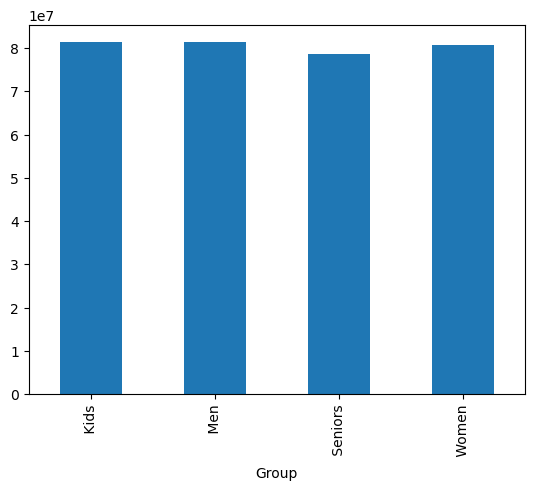

In [44]:
df.groupby('Group')['Sales'].sum().plot(kind = 'bar')

In [45]:
df.groupby('Group')['Time'].value_counts()

Group    Time     
Kids     Evening      625
         Morning      623
         Afternoon    617
Men      Afternoon    620
         Evening      620
         Morning      620
Seniors  Evening      619
         Morning      618
         Afternoon    617
Women    Morning      622
         Afternoon    620
         Evening      616
Name: count, dtype: int64

In [46]:
df.groupby('Date')['Sales'].sum()

Date
2020-10-01    3720000
2020-10-02    3715000
2020-10-03    3890000
2020-10-04    3720000
2020-10-05    3862500
               ...   
2020-12-26    3965000
2020-12-27    3772500
2020-12-28    3695000
2020-12-29    4032500
2020-12-30    4272500
Name: Sales, Length: 90, dtype: int32

<Axes: xlabel='Date'>

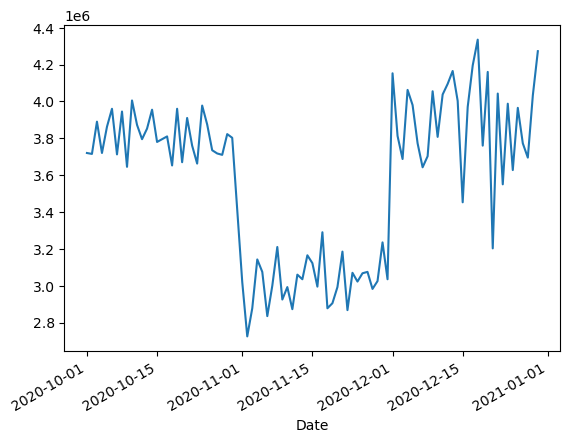

In [47]:
df.groupby('Date')['Sales'].sum().plot(kind = 'line')

In [48]:
df.groupby('State')['Sales'].sum()

State
NSW    74970000
NT     22580000
QLD    33417500
SA     58857500
TAS    22760000
VIC    87230000
WA     22152500
Name: Sales, dtype: int32

<Axes: xlabel='State'>

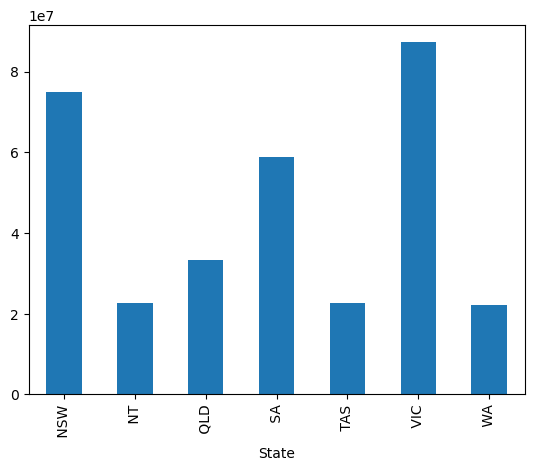

In [49]:
df.groupby('State')['Sales'].sum().plot(kind = 'bar')

In [50]:
df.groupby('State')['Group'].value_counts()

State  Group  
NSW    Kids       270
       Men        270
       Seniors    270
       Women      270
NT     Kids       270
       Men        270
       Seniors    270
       Women      270
QLD    Kids       270
       Men        270
       Seniors    270
       Women      270
SA     Kids       270
       Men        270
       Seniors    270
       Women      270
TAS    Kids       270
       Men        270
       Seniors    270
       Women      270
VIC    Kids       245
       Men        240
       Women      238
       Seniors    234
WA     Kids       270
       Men        270
       Seniors    270
       Women      270
Name: count, dtype: int64

<Axes: xlabel='State,Group'>

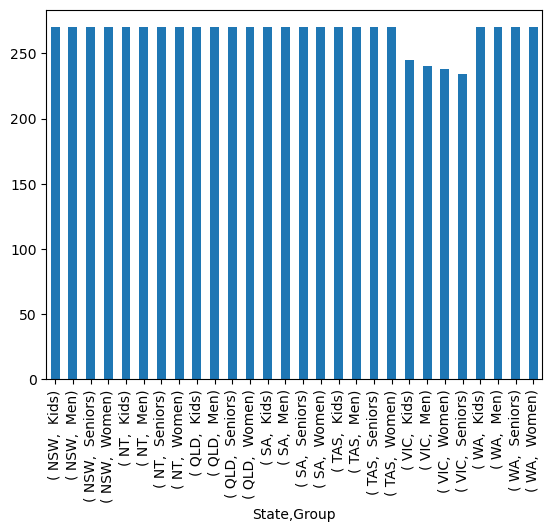

In [51]:
df.groupby('State')['Group'].value_counts().plot(kind = 'bar')

In [52]:
df.groupby('Group')['Unit'].sum()

Group
Kids       32547
Men        32526
Seniors    31459
Women      32255
Name: Unit, dtype: int32

<Axes: xlabel='Group'>

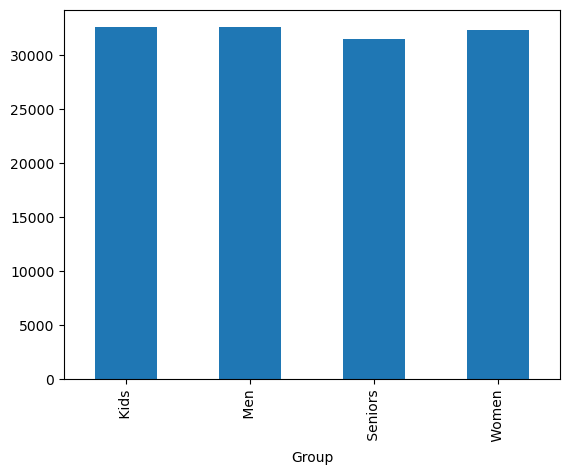

In [53]:
df.groupby('Group')['Unit'].sum().plot(kind = 'bar')

<Axes: xlabel='Group', ylabel='Sales'>

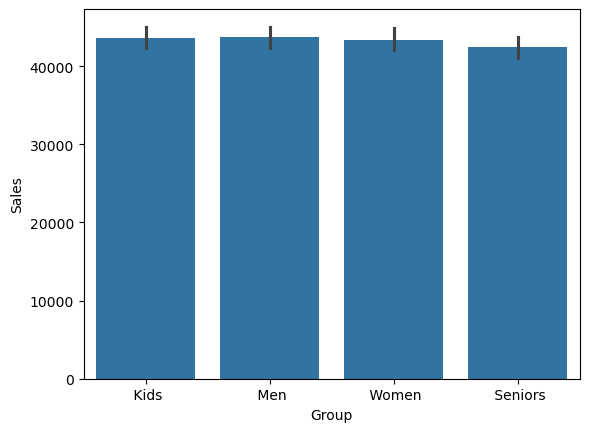

In [54]:
sns.barplot(x = 'Group', y = 'Sales', data = df)

2.	Data Analysis
●	Perform descriptive statistical analysis on the data (Sales and Unit columns) (Techniques such as mean, median, mode and standard deviation can be used.). 
●	Determine which group is generating the highest sales, and which group is generating the lowest sales.
●	Determine which state is generating the highest sales, and which state is generating the lowest sales.
●	Generate weekly, monthly and quarterly reports for the analysis made.
(Use suitable libraries such as NumPy, Pandas, SciPy etc. for performing the analysis.)


In [55]:
df.describe()

,Date,Unit,Sales
count,7437,7437.000000,7437.00000
mean,2020-11-14 15:42:11.181927936,17.317063,43292.65833
min,2020-10-01 00:00:00,2.000000,5000.00000
25%,2020-10-23 00:00:00,8.000000,20000.00000
50%,2020-11-15 00:00:00,14.000000,35000.00000
75%,2020-12-07 00:00:00,25.000000,62500.00000
max,2020-12-30 00:00:00,53.000000,132500.00000
std,NaN,11.826102,29565.25541


In [56]:
df['Sales'].mean()

43292.65832997176

In [57]:
df['Sales'].median()

35000.0

In [58]:
df['Sales'].mode()

0    22500
Name: Sales, dtype: int32

In [59]:
df['Sales'].std()

29565.255410371064

In [60]:
df['Sales'].var()

874104327.4804755

In [61]:
df['Unit'].mean()

17.317063331988706

In [62]:
df['Unit'].median()

14.0

In [63]:
df['Unit'].mode()

0    9
Name: Unit, dtype: int32

In [64]:
df['Unit'].std()

11.826102164148427

In [65]:
df['Unit'].var()

139.8566923968761

In [66]:
df['Unit'].skew()

0.8701234398876256

In [67]:
df['Unit'].kurt()

-0.19939606131767373

In [68]:
df['Sales'].skew()

0.8701234398876261

In [69]:
df['Sales'].kurt()

-0.19939606131767418

In [70]:
df.groupby('Group')['Sales'].sum()

Group
Kids       81367500
Men        81315000
Seniors    78647500
Women      80637500
Name: Sales, dtype: int32

In [71]:
highest_sales = df.groupby('Group')['Sales'].sum().max()

In [72]:
print(highest_sales)

81367500


In [73]:
lowest_sales = df.groupby('Group')['Sales'].sum().min()

In [74]:
print(lowest_sales)

78647500


In [75]:
## HIghest Sales in Kid Group 
## lowest Sales in Seniors Group

In [76]:
df.groupby('State')['Sales'].sum()

State
NSW    74970000
NT     22580000
QLD    33417500
SA     58857500
TAS    22760000
VIC    87230000
WA     22152500
Name: Sales, dtype: int32

In [77]:
## HIghest Sales in VIC state 
## lowest Sales in WA state

In [78]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index(['Date'], inplace = True)

In [79]:
wdf_mean = df['Sales'].resample('W').mean()
wdf_median = df['Sales'].resample('W').median()

In [80]:
wdf_median

Date
2020-10-04    35000.0
2020-10-11    37500.0
2020-10-18    35000.0
2020-10-25    35000.0
2020-11-01    32500.0
2020-11-08    25000.0
2020-11-15    25000.0
2020-11-22    25000.0
2020-11-29    25000.0
2020-12-06    37500.0
2020-12-13    37500.0
2020-12-20    37500.0
2020-12-27    37500.0
2021-01-03    37500.0
Freq: W-SUN, Name: Sales, dtype: float64

In [81]:
wdf_mean

Date
2020-10-04    44776.785714
2020-10-11    45922.619048
2020-10-18    45306.122449
2020-10-25    45603.741497
2020-11-01    43268.849206
2020-11-08    35484.693878
2020-11-15    36007.653061
2020-11-22    35905.612245
2020-11-29    36526.360544
2020-12-06    46741.622575
2020-12-13    49028.520499
2020-12-20    49511.545293
2020-12-27    47540.909091
2021-01-03    50000.000000
Freq: W-SUN, Name: Sales, dtype: float64

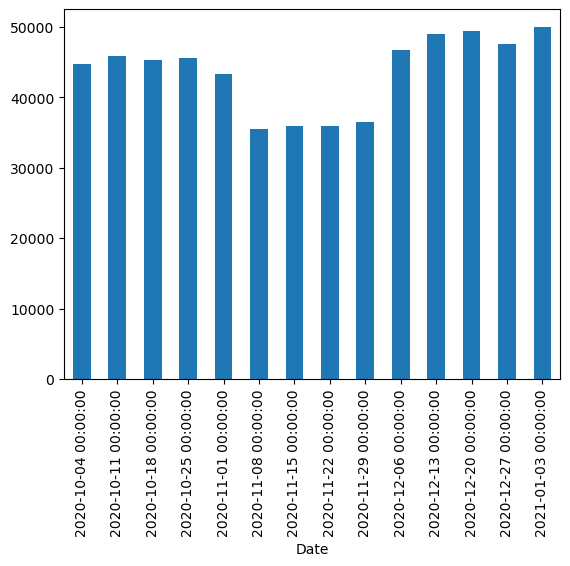

In [82]:
wdf_mean = df['Sales'].resample('W').mean().plot(kind = 'bar')

In [83]:
mdf = df['Sales'].resample('M').mean()

In [84]:
mdf

Date
2020-10-31    45353.174603
2020-11-30    35985.119048
2020-12-31    48808.927826
Freq: ME, Name: Sales, dtype: float64

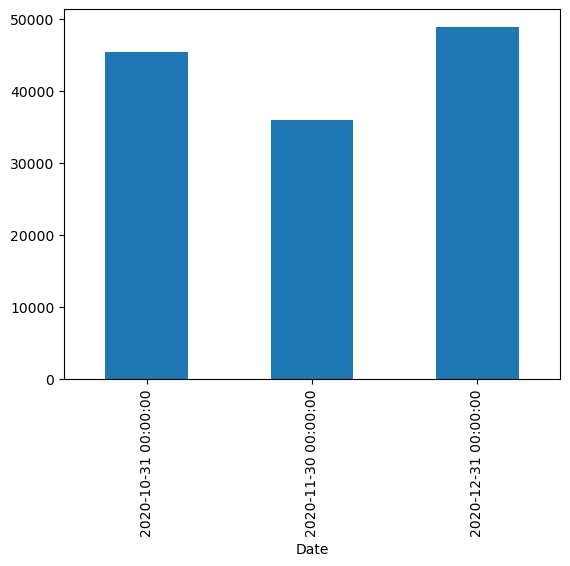

In [85]:
mdf = df['Sales'].resample('M').mean().plot(kind = 'bar')

In [86]:
qdf = df['Sales'].resample('Q').mean()

In [87]:
qdf

Date
2020-12-31    43292.65833
Freq: QE-DEC, Name: Sales, dtype: float64

3.	Data Visualization
●	Use appropriate data visualization libraries to build a dashboard for the Head of S&M that includes for the key parameters like 
○	State-wise sales analysis for different groups (kids, women, men, and seniors) 
○	Group-wise sales analysis (kids, women, men, and seniors) across different states.
○	Time-of-the-day analysis: during which time of the day are sales the highest, and during which time are sales the lowest? [This helps S&M teams design programs for increasing sales such as hyper-personalization and Next Best Offers].
The dashboard must contain daily, weekly, monthly and quarterly charts.


In [88]:
state_group_sales = df.groupby(['State', 'Group'])['Sales'].sum().unstack()

In [89]:
state_group_sales

Group,Kids,Men,Seniors,Women
State,,,,
NSW,18587500,19022500,18187500,19172500
NT,5700000,5762500,5465000,5652500
QLD,8510000,8392500,8190000,8325000
SA,14515000,14655000,14717500,14970000
TAS,5775000,5757500,5650000,5577500
VIC,22655000,21972500,20925000,21677500
WA,5625000,5752500,5512500,5262500


<Axes: title={'center': 'State Group Sales'}, xlabel='State'>

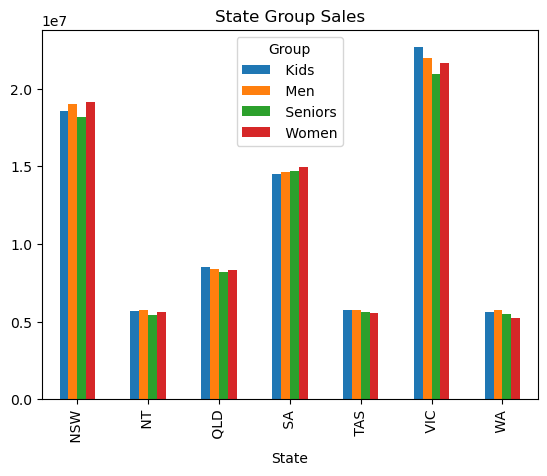

In [90]:
state_group_sales.plot(kind = 'bar', title = 'State Group Sales')

In [91]:
group_state_sales = df.groupby(['Group', 'State'])['Sales'].sum().unstack()

In [92]:
group_state_sales

State,NSW,NT,QLD,SA,TAS,VIC,WA
Group,,,,,,,
Kids,18587500,5700000,8510000,14515000,5775000,22655000,5625000
Men,19022500,5762500,8392500,14655000,5757500,21972500,5752500
Seniors,18187500,5465000,8190000,14717500,5650000,20925000,5512500
Women,19172500,5652500,8325000,14970000,5577500,21677500,5262500


<Axes: title={'center': 'Group State Sales'}, xlabel='Group'>

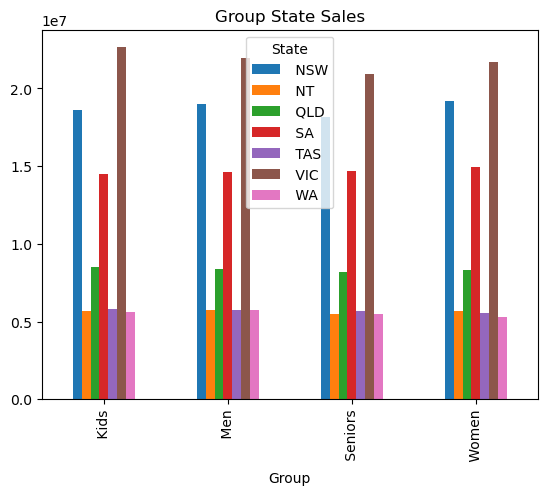

In [93]:
group_state_sales.plot(kind = 'bar', title = 'Group State Sales')

In [94]:
df.groupby('Time')['Sales'].sum()

Time
Afternoon    107175000
Evening      106125000
Morning      108667500
Name: Sales, dtype: int32

In [95]:
##Sales were highest in morning
##Sales were lowest in evening

In [96]:
Daily_sales = df.resample('D')['Sales'].sum()

In [97]:
Daily_sales

Date
2020-10-01    3720000
2020-10-02    3715000
2020-10-03    3890000
2020-10-04    3720000
2020-10-05    3862500
               ...   
2020-12-26    3965000
2020-12-27    3772500
2020-12-28    3695000
2020-12-29    4032500
2020-12-30    4272500
Freq: D, Name: Sales, Length: 91, dtype: int32

In [98]:
weekly_sales = df.resample('W')['Sales'].sum()

In [99]:
weekly_sales

Date
2020-10-04    15045000
2020-10-11    27002500
2020-10-18    26640000
2020-10-25    26815000
2020-11-01    21807500
2020-11-08    20865000
2020-11-15    21172500
2020-11-22    21112500
2020-11-29    21477500
2020-12-06    26502500
2020-12-13    27505000
2020-12-20    27875000
2020-12-27    26147500
2021-01-03    12000000
Freq: W-SUN, Name: Sales, dtype: int32

In [100]:
monthly_sales = df.resample('M')['Sales'].sum()

In [101]:
monthly_sales

Date
2020-10-31    114290000
2020-11-30     90682500
2020-12-31    116995000
Freq: ME, Name: Sales, dtype: int32

In [102]:
quarterly_sales = df.resample('Q')['Sales'].sum()

In [103]:
quarterly_sales

Date
2020-12-31    321967500
Freq: QE-DEC, Name: Sales, dtype: int32

In [104]:
weekly_date_time_sales = df.groupby('Time')['Sales'].resample('W').sum().unstack()

In [105]:

weekly_date_time_sales

Date,2020-10-04,2020-10-11,2020-10-18,2020-10-25,2020-11-01,2020-11-08,2020-11-15,2020-11-22,2020-11-29,2020-12-06,2020-12-13,2020-12-20,2020-12-27,2021-01-03
Time,,,,,,,,,,,,,,
Afternoon,4815000,8817500,8942500,8782500,7075000,7322500,7205000,7085000,7175000,8825000,9047500,9552500,8790000,3740000
Evening,5047500,9085000,8815000,8805000,7312500,6627500,6930000,6912500,7267500,8635000,9000000,9225000,8392500,4070000
Morning,5182500,9100000,8882500,9227500,7420000,6915000,7037500,7115000,7035000,9042500,9457500,9097500,8965000,4190000


In [106]:
df.reset_index(inplace=True)
df.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


In [107]:
# Extracting Date And Time parts
df['day'] = df['Date'].dt.day_name()
df['week'] = df['Date'].dt.isocalendar().week
df['month'] = df['Date'].dt.month_name()
df['quarter'] = df['Date'].dt.quarter

In [108]:
df.head()

,Date,Time,State,Group,Unit,Sales,day,week,month,quarter
0,2020-10-01,Morning,WA,Kids,8,20000,Thursday,40,October,4
1,2020-10-01,Morning,WA,Men,8,20000,Thursday,40,October,4
2,2020-10-01,Morning,WA,Women,4,10000,Thursday,40,October,4
3,2020-10-01,Morning,WA,Seniors,15,37500,Thursday,40,October,4
4,2020-10-01,Afternoon,WA,Kids,3,7500,Thursday,40,October,4


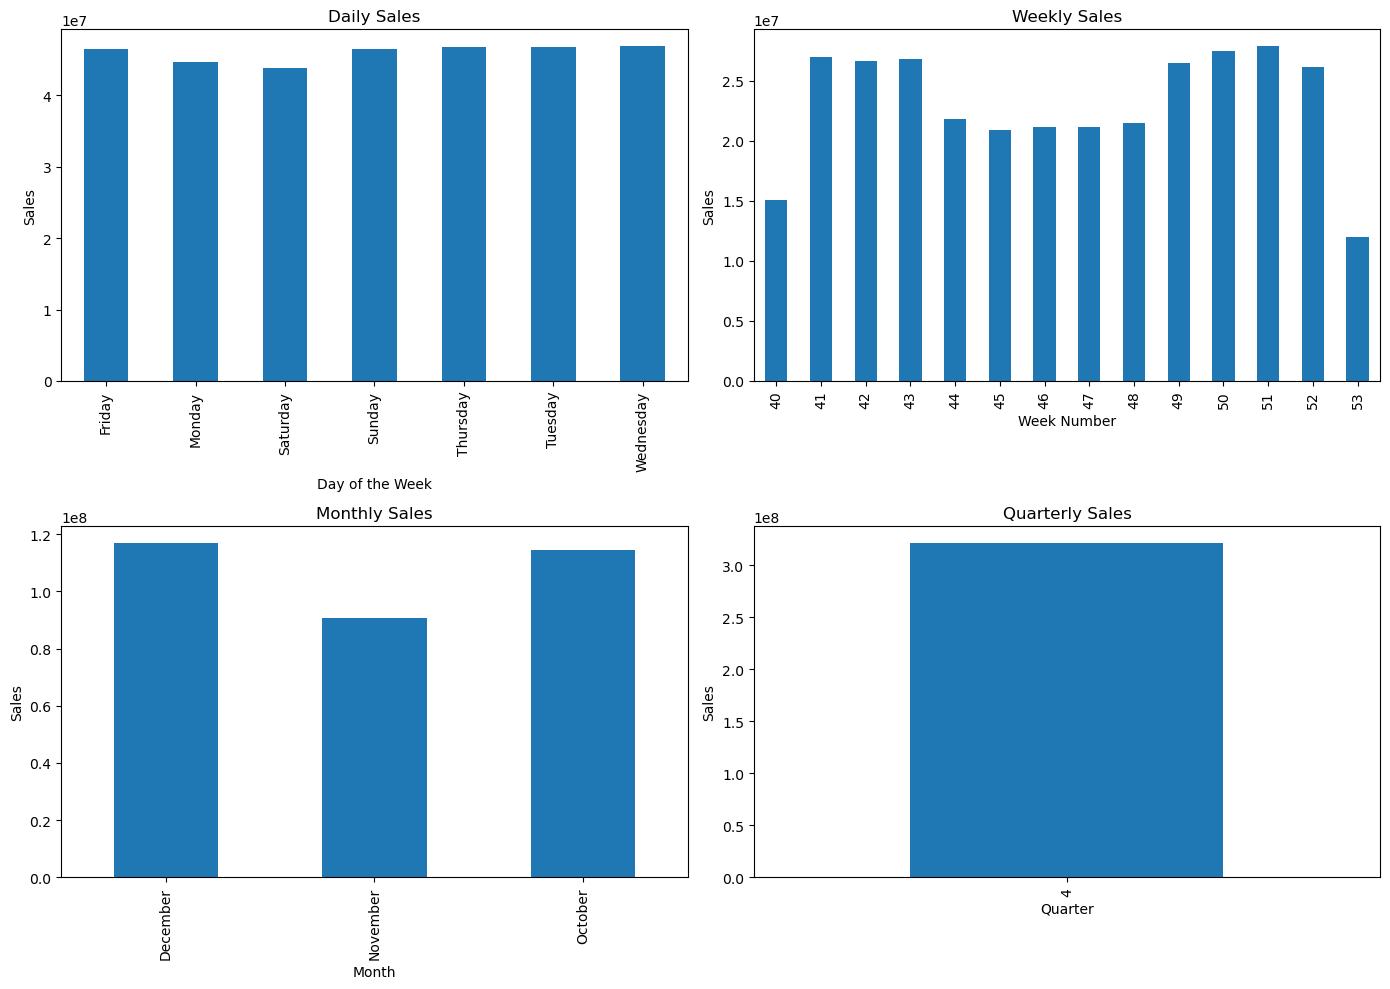

In [109]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Daily Sales
df.groupby('day')['Sales'].sum().plot(kind='bar', ax=ax[0, 0])
ax[0, 0].set_title('Daily Sales')
ax[0, 0].set_xlabel('Day of the Week')
ax[0, 0].set_ylabel('Sales')

# Weekly Sales
df.groupby('week')['Sales'].sum().plot(kind='bar', ax=ax[0, 1])
ax[0, 1].set_title('Weekly Sales')
ax[0, 1].set_xlabel('Week Number')
ax[0, 1].set_ylabel('Sales')

# Monthly Sales
df.groupby('month')['Sales'].sum().plot(kind='bar', ax=ax[1, 0])
ax[1, 0].set_title('Monthly Sales')
ax[1, 0].set_xlabel('Month')
ax[1, 0].set_ylabel('Sales')

# Quarterly Sales
df.groupby('quarter')['Sales'].sum().plot(kind='bar', ax=ax[1, 1])
ax[1, 1].set_title('Quarterly Sales')
ax[1, 1].set_xlabel('Quarter')
ax[1, 1].set_ylabel('Sales')

plt.tight_layout()
plt.show()

# sales remain roughly same through out the week 
# sales pickuped up after first week but decline in middle for around 5 weeks but picked up near the end of quarter than again declined in last week
# sales were low in November compared to the month of october and december

##Matplotlib
Matplotlib is a low-level, comprehensive library for creating static, animated, and interactive visualizations in Python.

Key Features:
Versatility: Matplotlib can create a wide variety of plots, including line plots, scatter plots, bar plots, histograms, pie charts, and more.
Customization: It offers extensive control over plot elements (titles, labels, legends, grid lines, etc.), allowing for highly customized visualizations.
Integration: Works well with other libraries like NumPy and Pandas, making it suitable for embedding plots within larger applications.
Publication-Quality: Matplotlib can produce high-quality graphs that are suitable for publication.

##Seaborn
Seaborn is a higher-level library built on top of Matplotlib, designed to make statistical data visualization easy and attractive.

Key Features:
Statistical Plots: Provides built-in functions for creating complex visualizations like violin plots, box plots, heatmaps, pair plots, and more.
Aesthetic Styles: Offers attractive default styles and color palettes to improve the aesthetics of plots.
Ease of Use: Simplifies the creation of common visualizations with concise syntax and easy-to-use functions.
Integration with Pandas: Works seamlessly with Pandas DataFrames, allowing for quick visualization of data directly from DataFrames.